In [1]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Nguồn tham khảo
https://github.com/ElzatY/aspect-based-sentiment-classification-model/blob/master/aspect_based_sentiment.ipynb


In [1]:

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

#Spacy
import spacy
nlp = spacy.load('en_core_web_sm')

# Other
import re
import json
import string
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

#Keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#load data
import pandas as pd
reviews_train = pd.read_csv("Dataset_DropWalmart.csv").astype(str)

#show first 5 records
reviews_train.head()

,Unnamed: 0,Name,Time,Store,Comment,Aspect,polarity
0,1128,Jenae K.,01-06-2018,Amazon Go,store awesome super cool concept definitley se...,data integration,positive
1,1129,Jenae K.,01-06-2018,Amazon Go,store awesome super cool concept definitley se...,marketing and communication,positive
2,1131,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...,technology,positive
3,1132,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...,payment and checkout,positive
4,1134,Jenae K.,01-06-2018,Amazon Go,product shelf sensor know grab item,technology,neutral


In [3]:
#drop unnecessary columns
reviews_train = reviews_train.drop(['Unnamed: 0'], axis=1)

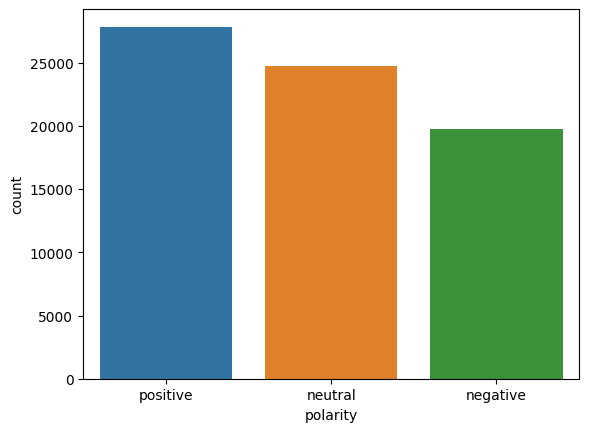

In [4]:
# plot the number of reviews per polarity
import matplotlib.pyplot as plt
import seaborn as sns
# create a countplot
sns.countplot(x='polarity', data=reviews_train)
# show the plot
plt.show()

In [37]:
#tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)
train_vectors = tfidf.fit_transform(reviews_train['Comment'])
test_vectors = tfidf.transform(reviews_train['Comment'])



In [39]:
#build random forest model for aspect classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_vectors, reviews_train['Aspect'], test_size=0.2, random_state=0)
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))


KeyboardInterrupt: 

In [38]:
#build random forest model for aspect based sentiment analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_vectors, reviews_train['polarity'], test_size=0.2, random_state=0)
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))


[[3388  152  332]
 [  33 4890   55]
 [ 158  129 5331]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3872
           1       0.95      0.98      0.96      4978
           2       0.93      0.95      0.94      5618

    accuracy                           0.94     14468
   macro avg       0.94      0.94      0.94     14468
weighted avg       0.94      0.94      0.94     14468

0.9406275919270113


In [27]:
#encoding aspect classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
reviews_train['Aspect'] = le.fit_transform(reviews_train['Aspect'])
reviews_train['Aspect'].value_counts()



8    18129
3    13237
1    11533
7     7191
5     5828
4     5570
9     5214
6     2487
2     1746
0     1404
Name: Aspect, dtype: int64

In [28]:
#build random forest model for aspect classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(train_vectors, reviews_train['Aspect'])
pred_rfc = rfc.predict(test_vectors)
print(classification_report(reviews_train['Aspect'], pred_rfc))
print(confusion_matrix(reviews_train['Aspect'], pred_rfc))
print(accuracy_score(reviews_train['Aspect'], pred_rfc))



              precision    recall  f1-score   support

           0       0.42      0.35      0.38      1404
           1       0.76      0.79      0.77     11533
           2       0.63      0.56      0.60      1746
           3       0.67      0.68      0.67     13237
           4       0.64      0.64      0.64      5570
           5       0.71      0.69      0.70      5828
           6       0.65      0.59      0.62      2487
           7       0.66      0.65      0.66      7191
           8       0.74      0.75      0.74     18129
           9       0.42      0.38      0.40      5214

    accuracy                           0.68     72339
   macro avg       0.63      0.61      0.62     72339
weighted avg       0.67      0.68      0.68     72339

[[  492    79    90   158    19    46    23    37   426    34]
 [   55  9080    41   363   204   246   179   323   638   404]
 [   87    83   985   174    55    46    15   157   103    41]
 [  122   400   113  9057   793   201   112   535  1

In [29]:
#function to predict aspect
def predict_aspect(text):
    text = tfidf.transform([text])
    return le.inverse_transform(rfc.predict(text))[0]



In [30]:
#predict aspect for a sample review
predict_aspect("I love this product")


8

In [31]:
#find aspect encoding=8
reviews_train[reviews_train['Aspect']==8]



,Name,Time,Store,Comment,Aspect,polarity
2,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...,8,2
4,Jenae K.,01-06-2018,Amazon Go,product shelf sensor know grab item,8,1
6,Jenae K.,01-06-2018,Amazon Go,super simple course still worker ensure entran...,8,2
11,Jenae K.,01-06-2018,Amazon Go,also cool dinner kit pretty tasty similar blue...,8,2
13,Tonya,01-09-2018,Amazon Go,check,8,1
...,...,...,...,...,...,...
72318,Priscilla V.,09-02-2019,Kroger,state michigan lot people would awfully happy job,8,2
72321,Ron R.,09-03-2022,Kroger,kroger boost scam boost dollar use take swipe ...,8,2
72332,AJ M.,09-04-2022,Kroger,no cart available,8,0
72334,AJ M.,09-04-2022,Kroger,shelf not well stock,8,0


In [33]:
#encoding polarity classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
reviews_train['polarity'] = le.fit_transform(reviews_train['polarity'])
reviews_train['polarity'].value_counts()


2    27842
1    24734
0    19763
Name: polarity, dtype: int64

In [34]:
#build random forest model for sentiment classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(train_vectors, reviews_train['polarity'])
pred_rfc = rfc.predict(test_vectors)
print(classification_report(reviews_train['polarity'], pred_rfc))
print(confusion_matrix(reviews_train['polarity'], pred_rfc))
print(accuracy_score(reviews_train['polarity'], pred_rfc))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19763
           1       1.00      1.00      1.00     24734
           2       1.00      1.00      1.00     27842

    accuracy                           1.00     72339
   macro avg       1.00      1.00      1.00     72339
weighted avg       1.00      1.00      1.00     72339

[[19742    21     0]
 [    1 24732     1]
 [    5    12 27825]]
0.9994470479271209


In [ ]:
#covert to 1d array
y = np.array(reviews_train['polarity'])
y = y.reshape(-1,1)


In [25]:
#encoding aspect classes and polarity classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
reviews_train['Aspect'] = le.fit_transform(reviews_train['Aspect'])
reviews_train['Aspect'].value_counts()
reviews_train['polarity'] = le.fit_transform(reviews_train['polarity'])
reviews_train['polarity'].value_counts()


2    27842
1    24734
0    19763
Name: polarity, dtype: int64

In [ ]:
#build random forest model for aspect classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(train_vectors, reviews_train['Aspect'])
pred_rfc = rfc.predict(test_vectors)
print(classification_report(reviews_train['Aspect'], pred_rfc))
print(confusion_matrix(reviews_train['Aspect'], pred_rfc))
print(accuracy_score(reviews_train['Aspect'], pred_rfc))

#build random forest model for sentiment classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rfc1 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc1.fit(train_vectors, reviews_train['polarity'])
pred_rfc1 = rfc1.predict(test_vectors)
print(classification_report(reviews_train['polarity'], pred_rfc1))
print(confusion_matrix(reviews_train['polarity'], pred_rfc1))
print(accuracy_score(reviews_train['polarity'], pred_rfc1))



In [23]:
#function to predict aspect and sentiment for a given review
def predict_aspect_sentiment(review):
    review_vector = tfidf.transform([review]) # vectorizing
    aspect = le.inverse_transform(rfc.predict(review_vector))[0] # make prediction
    sentiment = le.inverse_transform(rfc.predict1(review_vector))[0] # make prediction
    return aspect, sentiment



In [24]:
predict_aspect_sentiment("I love this product")

('positive', 'positive')

In [20]:
#function to predict aspect and sentiment
def predict_aspect_sentiment(text):
    #predict aspect
    text = [text]
    text = tfidf.transform(text)
    aspect = rfc.predict(text)
    aspect = le.inverse_transform(aspect)
    #predict sentiment
    text = [text]
    text = tfidf.transform(text)
    sentiment = rfc.predict(text)
    return aspect, sentiment


In [22]:
predict_aspect_sentiment("the food was good but the service was bad")

AttributeError: lower not found

In [5]:
#tokenize review text
vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(reviews_train.Comment)
reviews_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(reviews_train.Comment))

In [6]:
reviews_tokenized

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72334,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72335,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72336,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#encode aspect classes
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(reviews_train.Aspect)
encoded_aspect = to_categorical(integer_category)

In [8]:
# build a decision tree classifier for aspect classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_tokenized, encoded_aspect, test_size=0.2, random_state=42)

# build a decision tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

#print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, dtree.predict(X_test)))

Accuracy score:  0.3741360243295549


In [12]:
#build random forest classifier for aspect classification
from sklearn.ensemble import RandomForestClassifier

# build a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, rf.predict(X_test)))


RandomForestClassifier()

In [13]:
#print accuracy score
print("Accuracy score: ", accuracy_score(y_test, rf.predict(X_test)))


Accuracy score:  0.3734609080166203


In [ ]:
# predict the labels on validation dataset
predictions = dtree.predict(X_test)

# Report the confusion matrix for multi-class classification
print(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)))

In [16]:
# print classification results
predictions

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
# convert predictions to aspect classes
predictions_text = label_encoder.inverse_transform(predictions.argmax(axis=1))

In [18]:
predictions_text

array(['technology', 'general', 'privacy', ..., 'availability',
       'availability', 'payment'], dtype=object)

In [19]:
# function to predict aspect class for a given review
def predict_aspect(review):
    # remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove numbers
    review = re.sub(r'\d+', '', review)
    # remove stopwords
    review = ' '.join([word for word in review.split() if word not in (stopwords.words('english'))])
    # stemming
    stemmer = SnowballStemmer("english")
    review = ' '.join([stemmer.stem(word) for word in review.split()])
    # lowercase
    review = review.lower()
    # tokenize the review
    review_tokenized = tokenizer.texts_to_matrix([review])
    # predict the aspect class
    prediction = dtree.predict(review_tokenized)
    # convert the prediction to aspect class
    prediction_text = label_encoder.inverse_transform(prediction.argmax(axis=1))
    return prediction_text

In [20]:
# predict aspect class for a given review
predict_aspect("There will be less jobs in the future.")

array(['unemployment'], dtype=object)

In [21]:
#encode polarity classes
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(reviews_train.polarity)
encoded_polarity = to_categorical(integer_category)


In [22]:
# build a decision tree classifier for polarity classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [23]:
#split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_tokenized, encoded_polarity, test_size=0.2, random_state=42)


In [24]:
# build a decision tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [25]:
#predict the labels on validation dataset
predictions = dtree.predict(X_test)
# Report the confusion matrix for multi-class classification
print(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)))

[[2742   61  215]
 [  45 4965   54]
 [ 165   49 6956]]


In [26]:
#print model accuracy
print("Accuracy:",accuracy_score(y_test, predictions))


Accuracy: 0.9613821138211383


In [27]:
# print classification results
predictions

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [29]:
# convert predictions to polarity classes
predictions_text = label_encoder.inverse_transform(predictions.argmax(axis=1))
predictions_text



array(['neutral', 'positive', 'negative', ..., 'positive', 'neutral',
       'positive'], dtype=object)

In [30]:
# function to predict polarity class for a given review
def predict_polarity(review):
    # remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove numbers
    review = re.sub(r'\d+', '', review)
    # remove stopwords
    review = ' '.join([word for word in review.split() if word not in (stopwords.words('english'))])
    # stemming
    stemmer = SnowballStemmer("english")
    review = ' '.join([stemmer.stem(word) for word in review.split()])
    # lowercase
    review = review.lower()
    # tokenize the review
    review_tokenized = tokenizer.texts_to_matrix([review])
    # predict the polarity class
    prediction = dtree.predict(review_tokenized)
    # convert the prediction to polarity class
    prediction_text = label_encoder.inverse_transform(prediction.argmax(axis=1))
    return prediction_text


In [31]:
# predict polarity class for a given review
predict_polarity("There will be less jobs in the future.")


array(['neutral'], dtype=object)

In [32]:
predict_polarity("interesting concept grab quick bite")


array(['positive'], dtype=object)

In [33]:
#K-fold cross validation
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score

# define 10-fold cross validation test harness
#kfold = KFold(n_splits=10, shuffle=True, random_state=42)
#cv_results = cross_val_score(dtree, reviews_tokenized, encoded_polarity, cv=kfold, scoring='accuracy')
#print(cv_results.mean())

# predict the labels on validation dataset
#predictions = cross_val_predict(dtree, reviews_tokenized, encoded_polarity, cv=kfold)

# Report the confusion matrix for multi-class classification
#print(confusion_matrix(encoded_polarity.argmax(axis=1), predictions.argmax(axis=1)))

#print model accuracy
#print("Accuracy:",accuracy_score(encoded_polarity, predictions))


